### Part 1: Clustering

Perform clustering on FIFA 18 player performance data (PlayerAttributeData.csv)

Use both visuals and statistical methods (elbow) to identify a cluster multiplicity

Use the PlayerPersonalData.csv data to assign a label to each cluster (e.g. cluster x - average age is young, nationality is Spanish, and wages are high)

In [152]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Reading the data

In [353]:
data = pd.read_csv('PlayerAttributeData.csv', dtype=str)



In [354]:
data = data.drop(['Unnamed: 0'],1)

In [355]:
data.columns

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'ID',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')

In [360]:
data[data['ID'].duplicated()==True].count()

Acceleration          52
Aggression            52
Agility               52
Balance               52
Ball control          52
Composure             52
Crossing              52
Curve                 52
Dribbling             52
Finishing             52
Free kick accuracy    52
GK diving             52
GK handling           52
GK kicking            52
GK positioning        52
GK reflexes           52
Heading accuracy      52
ID                    52
Interceptions         52
Jumping               52
Long passing          52
Long shots            52
Marking               52
Penalties             52
Positioning           52
Reactions             52
Short passing         52
Shot power            52
Sliding tackle        52
Sprint speed          52
Stamina               52
Standing tackle       52
Strength              52
Vision                52
Volleys               52
dtype: int64

In [361]:
data = data.drop_duplicates()

In [363]:
data.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11


In [364]:
data.isnull().sum()

Acceleration          0
Aggression            0
Agility               0
Balance               0
Ball control          0
Composure             0
Crossing              0
Curve                 0
Dribbling             0
Finishing             0
Free kick accuracy    0
GK diving             0
GK handling           0
GK kicking            0
GK positioning        0
GK reflexes           0
Heading accuracy      0
ID                    0
Interceptions         0
Jumping               0
Long passing          0
Long shots            0
Marking               0
Penalties             0
Positioning           0
Reactions             0
Short passing         0
Shot power            0
Sliding tackle        0
Sprint speed          0
Stamina               0
Standing tackle       0
Strength              0
Vision                0
Volleys               0
dtype: int64

In [287]:
ids=data['ID']

In [288]:
ids

0         20801
1        158023
2        190871
3        176580
4        167495
          ...  
17976    237463
17977     11728
17978    231381
17979    238813
17980    238308
Name: ID, Length: 17981, dtype: object

In [206]:
data.head()

,Unnamed: 0,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,0,89,63,89,63,93,95,85,81,91,...,96,83,94,23,91,92,31,80,85,88
1,1,92,48,90,95,95,96,77,89,97,...,95,88,85,26,87,73,28,59,90,85
2,2,94,56,96,82,95,92,75,81,96,...,88,81,80,33,90,78,24,53,80,83
3,3,88,78,86,60,91,83,77,86,86,...,93,83,87,38,77,89,45,80,84,88
4,4,58,29,52,35,48,70,15,14,30,...,85,55,25,11,61,44,10,83,70,11


In [155]:
data.columns


Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'ID',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')

In [356]:
data.dtypes

Acceleration          object
Aggression            object
Agility               object
Balance               object
Ball control          object
Composure             object
Crossing              object
Curve                 object
Dribbling             object
Finishing             object
Free kick accuracy    object
GK diving             object
GK handling           object
GK kicking            object
GK positioning        object
GK reflexes           object
Heading accuracy      object
ID                    object
Interceptions         object
Jumping               object
Long passing          object
Long shots            object
Marking               object
Penalties             object
Positioning           object
Reactions             object
Short passing         object
Shot power            object
Sliding tackle        object
Sprint speed          object
Stamina               object
Standing tackle       object
Strength              object
Vision                object
Volleys       

In [221]:
data.shape

(17981, 35)

In [222]:
data.Acceleration.unique()

array(['89', '92', '94', '88', '58', '79', '57', '93', '60', '78', '75',
       '76', '46', '90', '68', '49', '43', '87', '77', '95', '62', '72',
       '65', '70', '63', '82', '69', '67', '54', '55', '74', '86', '84',
       '48', '80', '71', '85', '40', '51', '38', '53', '73', '45', '61',
       '64', '44', '42', '81', '91', '59', '52', '66', '39', '34', '50',
       '83', '47', '96', '31', '30', '70+9', '56', '26', '80+1', '35',
       '36', '32', '49-1', '41', '67+2', '37', '28', '33', '20', '79-2',
       '65-2', '29', '91-2', '74-3', '75+1', '41-6', '74+1', '70+3', '17',
       '75+5', '74+2', '71+2', '68+1', '71+4', '89-2', '25', '27', '24',
       '58-10', '78+1', '86+1', '66-1', '22', '66+1', '15', '74+4',
       '71-3', '80+2', '21', '23', '64-2', '18', '57-4', '78+3', '19',
       '73+9', '82-3', '68+3', '68+2', '55-8', '55-1', '43-2', '77+3',
       '82+10', '16', '49-10', '72+1', '61+1', '79+8', '70-2', '13', '14',
       '60-2', '86+7', '81+4', '69+3', '65-10', '64-3', '7

In [357]:
data = data.applymap(eval)# sum up the data invert to int

In [349]:
data.dtypes

Acceleration          int64
Aggression            int64
Agility               int64
Balance               int64
Ball control          int64
Composure             int64
Crossing              int64
Curve                 int64
Dribbling             int64
Finishing             int64
Free kick accuracy    int64
GK diving             int64
GK handling           int64
GK kicking            int64
GK positioning        int64
GK reflexes           int64
Heading accuracy      int64
ID                    int64
Interceptions         int64
Jumping               int64
Long passing          int64
Long shots            int64
Marking               int64
Penalties             int64
Positioning           int64
Reactions             int64
Short passing         int64
Shot power            int64
Sliding tackle        int64
Sprint speed          int64
Stamina               int64
Standing tackle       int64
Strength              int64
Vision                int64
Volleys               int64
dtype: object

In [ ]:
#data_cln = data.applymap(lambda x: re.sub(r'[\+|\-]\d+$','',str(x)))

In [ ]:
#sns.pairplot(data,palette='Set1')

### Explore the data

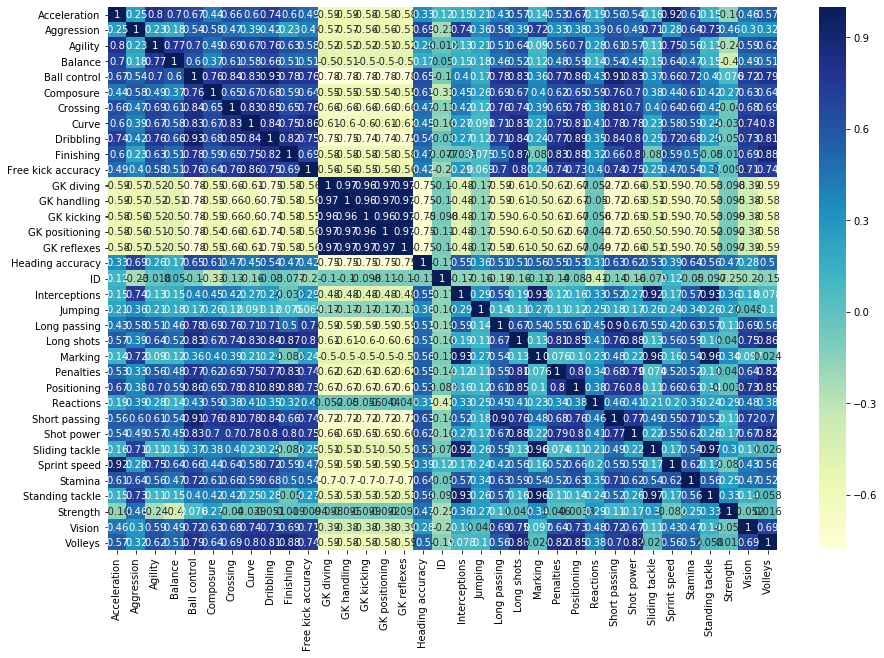

In [225]:
fig, ax = plt.subplots(figsize=(15,10)) #find correlations
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

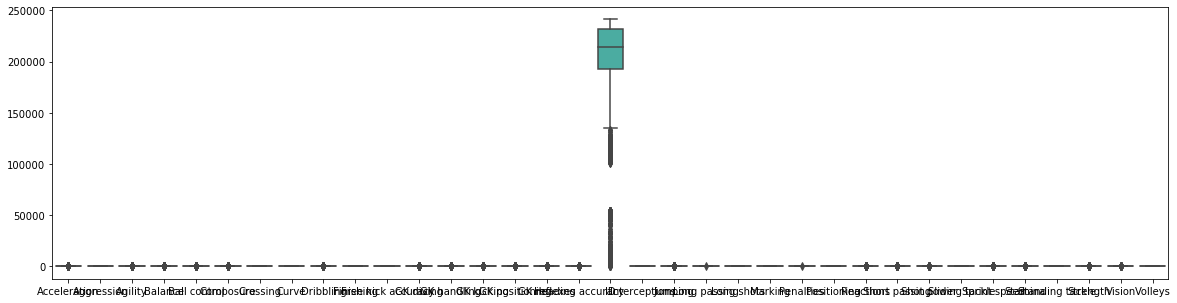

In [388]:
plt.figure(figsize=(20,5))
sns.boxplot(data = data)

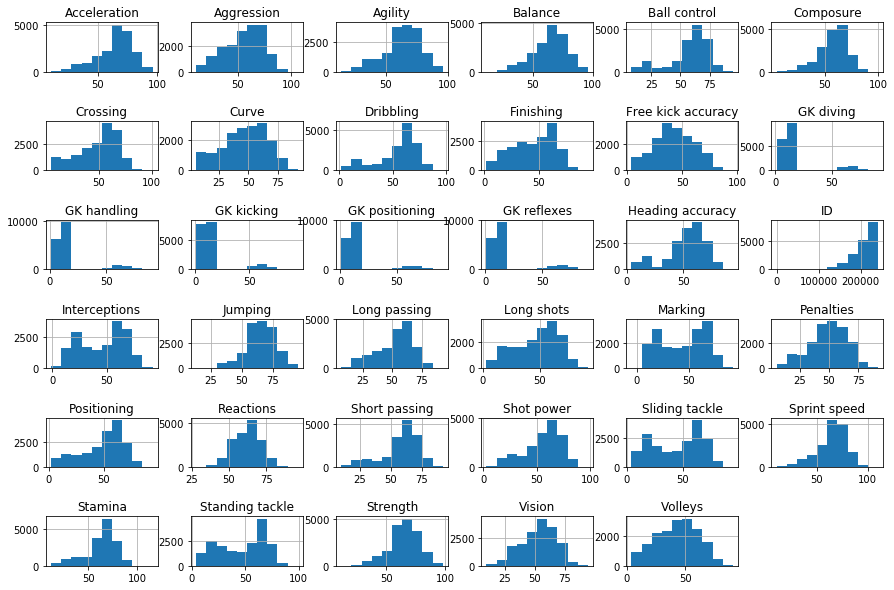

In [384]:

data.hist(figsize = (15,10))
plt.subplots_adjust(hspace=1) 
#plt.axvlines(np.mean(data['Acceleration']), label='Mean - {:.3f}'.format(np.mean(data['Acceleration'])))

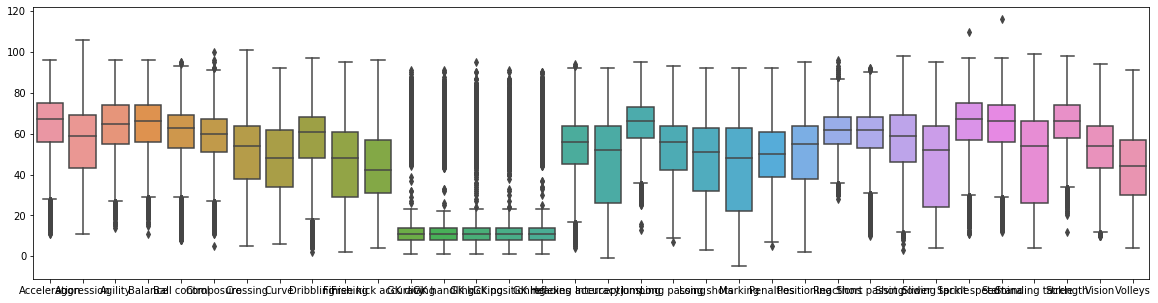

In [387]:
plt.figure(figsize=(20,5))
sns.boxplot(data = data.drop('ID', axis=1))

In [391]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [392]:
#scale the data
sc = StandardScaler()
sc_data = sc.fit_transform(data)
sc_data = pd.DataFrame(sc_data, columns=data.columns)

In [393]:
sc_data.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,1.637041,0.411300,1.735831,-0.057050,2.080235,2.873411,1.909840,1.826579,1.894798,2.502947,...,3.724665,1.657277,2.205737,-1.050454,1.786822,1.803950,-0.752946,1.165634,2.226562,2.528151
1,1.838174,-0.446977,1.803425,2.212942,2.199382,2.950793,1.476376,2.259996,2.210937,2.554309,...,3.615527,1.992472,1.688333,-0.910803,1.513842,0.611939,-0.890357,-0.497924,2.574360,2.358889
2,1.972263,0.010771,2.208985,1.290758,2.199382,2.641265,1.368010,1.826579,2.158247,2.246133,...,2.851567,1.523199,1.400887,-0.584949,1.718577,0.925626,-1.073571,-0.973227,1.878764,2.246047
3,1.569997,1.269578,1.533051,-0.269861,1.961089,1.944827,1.476376,2.097465,1.631350,2.502947,...,3.397253,1.657277,1.803312,-0.352197,0.831391,1.615738,-0.111697,1.165634,2.157002,2.528151
4,-0.441336,-1.534128,-0.765127,-2.043293,-0.600565,0.938861,-1.882967,-1.803285,-1.319273,-1.657441,...,2.524156,-0.219812,-1.761025,-1.609061,-0.260529,-1.207446,-1.714820,1.403285,1.183168,-1.816250


###  K-means clustering

In [395]:
data_k=sc_data.drop(['ID'],1)

In [396]:
data_k.shape

(17929, 34)

In [398]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    y_means = kmeans.fit(data_k)
    wcss.append(y_means.inertia_)

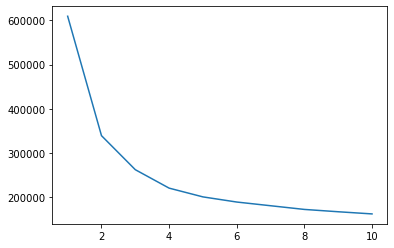

In [399]:
plt.plot(range(1,11), wcss)
plt.show()

In [400]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(data_k)

In [401]:
colmeans=data_k.mean()

In [403]:
y_kmeans_ = y_kmeans
cluster = pd.DataFrame(y_kmeans_,columns=['cluster'])

In [404]:
cluster

,cluster
0,2
1,2
2,2
3,2
4,1
...,...
17924,1
17925,1
17926,3
17927,0


In [405]:
data_k['cluster'] = cluster

In [501]:
sc_data

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,1.637041,0.411300,1.735831,-0.057050,2.080235,2.873411,1.909840,1.826579,1.894798,2.502947,...,3.724665,1.657277,2.205737,-1.050454,1.786822,1.803950,-0.752946,1.165634,2.226562,2.528151
1,1.838174,-0.446977,1.803425,2.212942,2.199382,2.950793,1.476376,2.259996,2.210937,2.554309,...,3.615527,1.992472,1.688333,-0.910803,1.513842,0.611939,-0.890357,-0.497924,2.574360,2.358889
2,1.972263,0.010771,2.208985,1.290758,2.199382,2.641265,1.368010,1.826579,2.158247,2.246133,...,2.851567,1.523199,1.400887,-0.584949,1.718577,0.925626,-1.073571,-0.973227,1.878764,2.246047
3,1.569997,1.269578,1.533051,-0.269861,1.961089,1.944827,1.476376,2.097465,1.631350,2.502947,...,3.397253,1.657277,1.803312,-0.352197,0.831391,1.615738,-0.111697,1.165634,2.157002,2.528151
4,-0.441336,-1.534128,-0.765127,-2.043293,-0.600565,0.938861,-1.882967,-1.803285,-1.319273,-1.657441,...,2.524156,-0.219812,-1.761025,-1.609061,-0.260529,-1.207446,-1.714820,1.403285,1.183168,-1.816250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17924,-2.720847,-2.277969,-1.711435,-2.681728,-2.745204,-2.698094,-1.937150,-1.857462,-2.267688,-2.068344,...,-2.387017,-2.633213,-2.105960,-1.655611,-2.239636,-2.211244,-1.669016,-1.210878,-1.877453,-2.098354
17925,-2.653802,-0.675851,-1.914215,-1.404857,-2.149471,-1.073072,-2.099699,-1.911639,-2.320377,-1.760167,...,-1.186508,-3.102486,-2.450896,-1.515960,-2.717351,-1.960295,-1.623213,-1.448529,-2.503489,-1.759829
17926,0.095019,-1.705784,-0.224379,0.936072,-1.017578,-0.608780,-1.178589,-0.828097,-0.950445,0.088894,...,-0.859097,-1.091318,-0.783707,-1.469409,-0.942980,-1.897557,-1.394195,-2.636785,-1.112297,-0.574992
17927,-0.508381,-0.561414,-0.359566,0.723260,-0.898431,-0.995690,-0.853491,-0.936451,-0.739686,-0.681548,...,-1.404783,-0.622046,-0.726217,0.066758,-0.465265,-0.893759,0.025713,-1.527746,-0.138463,-1.026359


In [407]:
data_cl=pd.DataFrame(data_k.groupby(['cluster']).mean())

In [497]:
data_cl


,cluster,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,0,-0.253524,0.447340,-0.449935,-0.308237,-0.257668,-0.202184,-0.275083,-0.543686,-0.392973,...,-0.360101,-0.142485,-0.458676,0.782651,-0.211654,0.112221,0.772637,0.378705,-0.710822,-0.633698
1,1,-1.724091,-1.665047,-1.532366,-1.455957,-2.266057,-1.651449,-1.915627,-1.759172,-2.160330,...,-0.286342,-2.103361,-1.902788,-1.463038,-1.743713,-2.043087,-1.520766,-0.335342,-1.174571,-1.702237
2,2,0.374981,0.675737,0.511387,0.430904,0.717919,0.747059,0.809469,0.826689,0.666322,...,0.743873,0.805888,0.716570,0.648839,0.350341,0.704145,0.677098,0.189521,0.832527,0.611522
3,3,0.504580,-0.463671,0.481180,0.400794,0.371288,0.063282,0.167292,0.341393,0.508422,...,-0.293183,0.117457,0.424348,-0.822971,0.497316,-0.040783,-0.820142,-0.413673,0.273913,0.615848


In [419]:
data_cl.columns

Index(['cluster', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')

In [409]:
data_cl=data_cl.reset_index()

In [410]:
data_cl.columns

Index(['cluster', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')

In [411]:
data_cl

,cluster,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,0,-0.253524,0.447340,-0.449935,-0.308237,-0.257668,-0.202184,-0.275083,-0.543686,-0.392973,...,-0.360101,-0.142485,-0.458676,0.782651,-0.211654,0.112221,0.772637,0.378705,-0.710822,-0.633698
1,1,-1.724091,-1.665047,-1.532366,-1.455957,-2.266057,-1.651449,-1.915627,-1.759172,-2.160330,...,-0.286342,-2.103361,-1.902788,-1.463038,-1.743713,-2.043087,-1.520766,-0.335342,-1.174571,-1.702237
2,2,0.374981,0.675737,0.511387,0.430904,0.717919,0.747059,0.809469,0.826689,0.666322,...,0.743873,0.805888,0.716570,0.648839,0.350341,0.704145,0.677098,0.189521,0.832527,0.611522
3,3,0.504580,-0.463671,0.481180,0.400794,0.371288,0.063282,0.167292,0.341393,0.508422,...,-0.293183,0.117457,0.424348,-0.822971,0.497316,-0.040783,-0.820142,-0.413673,0.273913,0.615848


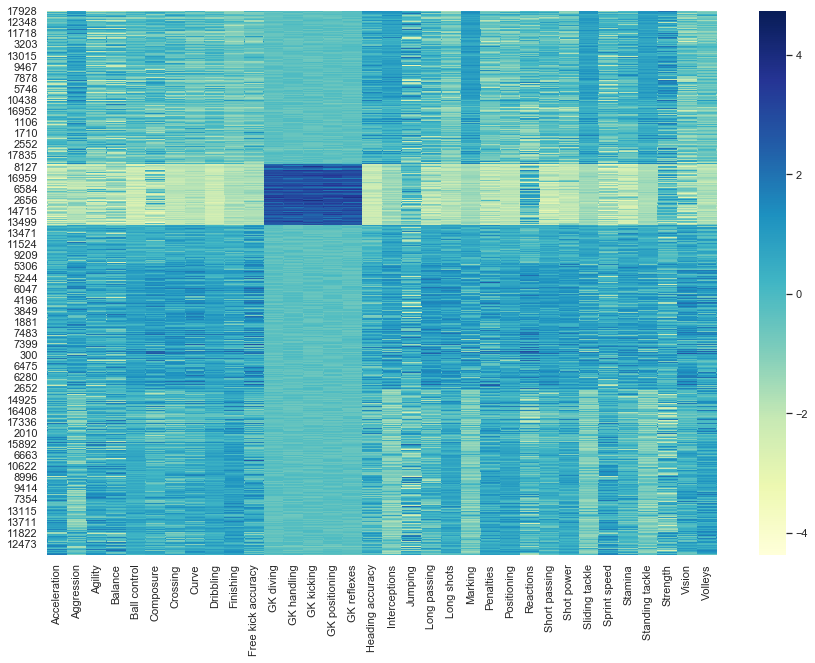

In [548]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data_k.sort_values(by = 'cluster').drop(columns = 'cluster'), cmap='YlGnBu');

### Loading the personal data

In [337]:
data2 = pd.read_csv('PlayerPersonalData.csv')
data2.head()

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
0,0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228
1,1,1,158023,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154
2,2,2,190871,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100
3,3,3,176580,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291
4,4,4,167495,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493


In [338]:
data2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Name', 'Age', 'Photo',
       'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo',
       'Value', 'Wage', 'Special'],
      dtype='object')

In [339]:
data2 = data2.drop(['Unnamed: 0','Unnamed: 0.1','Photo'],1)

In [340]:
data2 = data2.drop(['Club Logo'],1)

In [341]:
data2 = data2.drop(['Flag'],1)

In [342]:
data2.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493


In [203]:
data2.isnull().sum()

ID               0
Name             0
Age              0
Nationality      0
Overall          0
Potential        0
Club           248
Value            0
Wage             0
Special          0
dtype: int64

In [416]:
data2[data2['ID'].duplicated()==True].count()

ID             52
Name           52
Age            52
Nationality    52
Overall        52
Potential      52
Club           52
Value          52
Wage           52
Special        52
dtype: int64

In [438]:
# removing dublicates
data2 = data2.drop_duplicates()

In [439]:
cluster['ID'] = ids

In [440]:
cluster

,cluster,ID
0,2,20801
1,2,158023
2,2,190871
3,2,176580
4,1,167495
...,...,...
17924,1,237535
17925,1,231651
17926,3,233699
17927,0,225510


In [441]:
cluster["ID"]=cluster["ID"].astype(str)
data2["ID"]=data2["ID"].astype(str)
merges = pd.merge(cluster,data2, how = "inner", on="ID")


In [442]:
merges['ID'].astype(int)
merges.head()

,cluster,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
0,2,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228
1,2,158023,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154
2,2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100
3,2,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291
4,1,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493


In [435]:
data_k.columns

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'cluster'],
      dtype='object')

In [443]:
merges['Value']=merges['Value'].str.replace('€',"")

In [444]:
merges['Value']=merges['Value'].str.replace('M',"*1000")

In [445]:
merges['Value']=merges['Value'].str.replace('K',"")

In [458]:
merges['Wage']=merges['Wage'].str.replace('K',"")

In [460]:
merges['Wage']=merges['Wage'].str.replace('€',"")

In [466]:
merges['Wage'] = merges['Wage'].apply(eval)

In [467]:
merges.groupby(['cluster'])['Value'].mean()


cluster
0    1211.232471
1    1954.599802
2    4808.242289
3    1267.851648
Name: Value, dtype: float64

In [513]:
merges.head()

,cluster,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
0,2,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500.0,565,2228
1,2,158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000.0,565,2154
2,2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000.0,280,2100
3,2,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000.0,510,2291
4,1,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000.0,230,1493


In [468]:
merges.dtypes

cluster          int32
ID              object
Name            object
Age              int64
Nationality     object
Overall          int64
Potential        int64
Club            object
Value          float64
Wage             int64
Special          int64
dtype: object

In [470]:
merges.shape

(17929, 11)

In [514]:
data_cl

,cluster,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,0,-0.253524,0.447340,-0.449935,-0.308237,-0.257668,-0.202184,-0.275083,-0.543686,-0.392973,...,-0.360101,-0.142485,-0.458676,0.782651,-0.211654,0.112221,0.772637,0.378705,-0.710822,-0.633698
1,1,-1.724091,-1.665047,-1.532366,-1.455957,-2.266057,-1.651449,-1.915627,-1.759172,-2.160330,...,-0.286342,-2.103361,-1.902788,-1.463038,-1.743713,-2.043087,-1.520766,-0.335342,-1.174571,-1.702237
2,2,0.374981,0.675737,0.511387,0.430904,0.717919,0.747059,0.809469,0.826689,0.666322,...,0.743873,0.805888,0.716570,0.648839,0.350341,0.704145,0.677098,0.189521,0.832527,0.611522
3,3,0.504580,-0.463671,0.481180,0.400794,0.371288,0.063282,0.167292,0.341393,0.508422,...,-0.293183,0.117457,0.424348,-0.822971,0.497316,-0.040783,-0.820142,-0.413673,0.273913,0.615848


In [456]:
merges.columns

Index(['cluster', 'ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Wage', 'Special'],
      dtype='object')

In [503]:
group=pd.DataFrame(merges.groupby(['cluster']).mean())

In [506]:
group=group.reset_index()

In [507]:
merges_ = pd.merge(data_cl,group, how = "inner", on="cluster")

In [511]:
merges_.columns

Index(['cluster', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Age', 'Overall', 'Potential', 'Value',
       'Wage', 'Special'],
      dtype='object')

In [480]:
sc_data.columns

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'ID',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')

In [509]:
for group in range(4):
    df_group=merges_.loc[merges_['cluster'] == group]
    for column in df_group.columns:
        try:
            print('group %s, column %s, mode %s'%(group,column,stats.mode(df_group[column], axis=None)[0]))
        except:
           print('Error in group %s, column %s'%(group,column))

group 0, column cluster, mode [0]
group 0, column Acceleration, mode [-0.25352445]
group 0, column Aggression, mode [0.44734025]
group 0, column Agility, mode [-0.44993534]
group 0, column Balance, mode [-0.30823734]
group 0, column Ball control, mode [-0.25766785]
group 0, column Composure, mode [-0.20218402]
group 0, column Crossing, mode [-0.275083]
group 0, column Curve, mode [-0.54368634]
group 0, column Dribbling, mode [-0.39297307]
group 0, column Finishing, mode [-0.71907315]
group 0, column Free kick accuracy, mode [-0.47396013]
group 0, column GK diving, mode [-0.34970739]
group 0, column GK handling, mode [-0.35112949]
group 0, column GK kicking, mode [-0.35317586]
group 0, column GK positioning, mode [-0.34708689]
group 0, column GK reflexes, mode [-0.35160732]
group 0, column Heading accuracy, mode [0.41131193]
group 0, column Interceptions, mode [0.69477628]
group 0, column Jumping, mode [0.19289362]
group 0, column Long passing, mode [-0.11257129]
group 0, column Long sh

In [510]:
# Let's see which column is more representative of each group
for group in range(4):
    df_group=merges_.loc[merges['cluster'] == group]
    df_group=df_group.drop(labels=['cluster'],axis=1)
    count=0
    for column in df_group.columns:
        try:
            representative_mode=stats.mode(df_group[column], axis=None)
            if representative_mode[1] > count:
                representative=stats.mode(df_group[column], axis=None)[0]
                count = stats.mode(df_group[column], axis=None)[1]
                representative_column=column
        except:
            pass

    print('group %s, column %s, mode %s'%(group,representative_column,representative))

group 0, column GK reflexes, mode [-0.43526098]
group 1, column GK reflexes, mode [-0.43526098]
group 2, column Acceleration, mode [-1.72409097]
group 3, column Acceleration, mode [-1.72409097]


C:\Users\ooles\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if __name__ == '__main__':


In [494]:
# Let's see which column is more representative of each group
for group in range(4):
    df_group=data_k.loc[merges['cluster'] == group]
    df_group=df_group.drop(labels=['cluster'],axis=1)
    count=0
    for column in df_group.columns:
        try:
            representative_mode=stats.mode(df_group[column], axis=None)
            if representative_mode[1] > count:
                representative=stats.mode(df_group[column], axis=None)[0]
                count = stats.mode(df_group[column], axis=None)[1]
                representative_column=column
        except:
            pass

    print('group %s, column %s, mode %s'%(group,representative_column,representative))

group 0, column GK handling, mode [-0.44166369]
group 1, column Sliding tackle, mode [-1.51595964]
group 2, column GK positioning, mode [-0.43806092]
group 3, column GK reflexes, mode [-0.43526098]


In [519]:
data_k.columns

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'cluster'],
      dtype='object')

In [524]:
data.columns

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'ID',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')

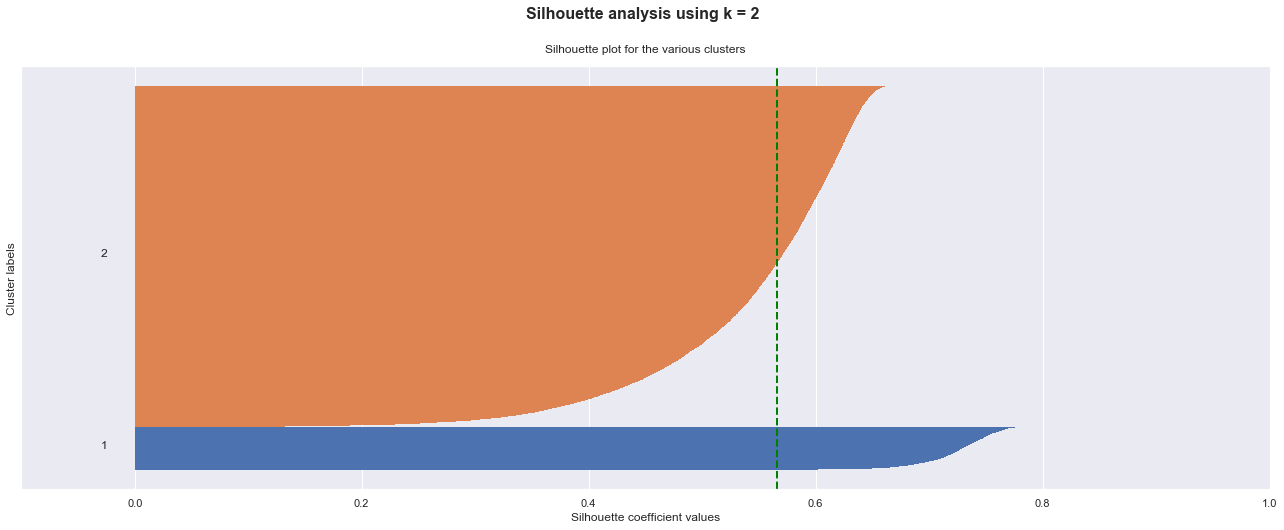

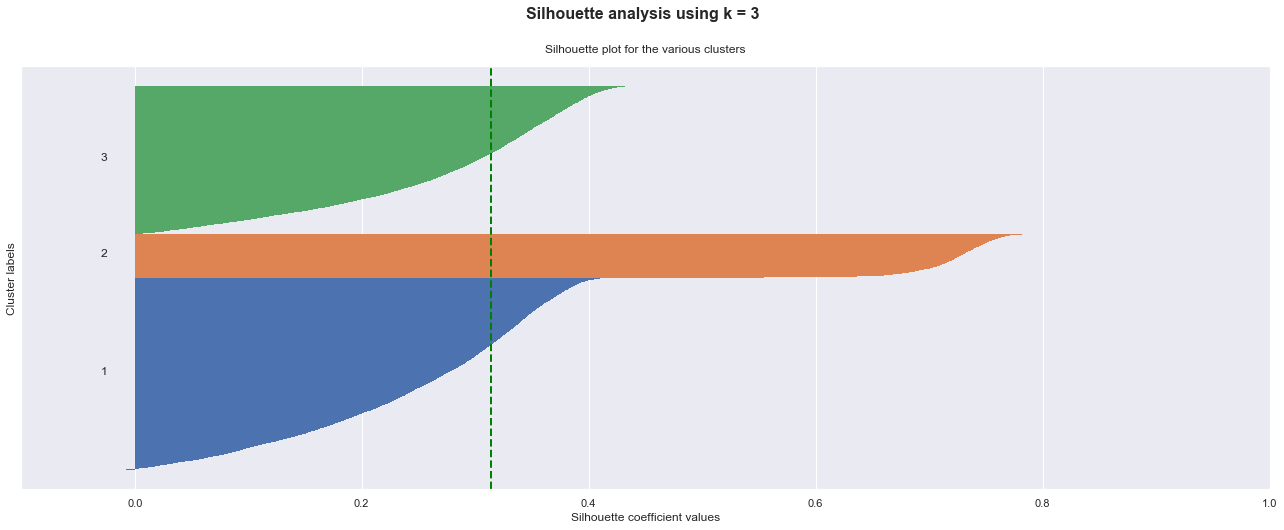

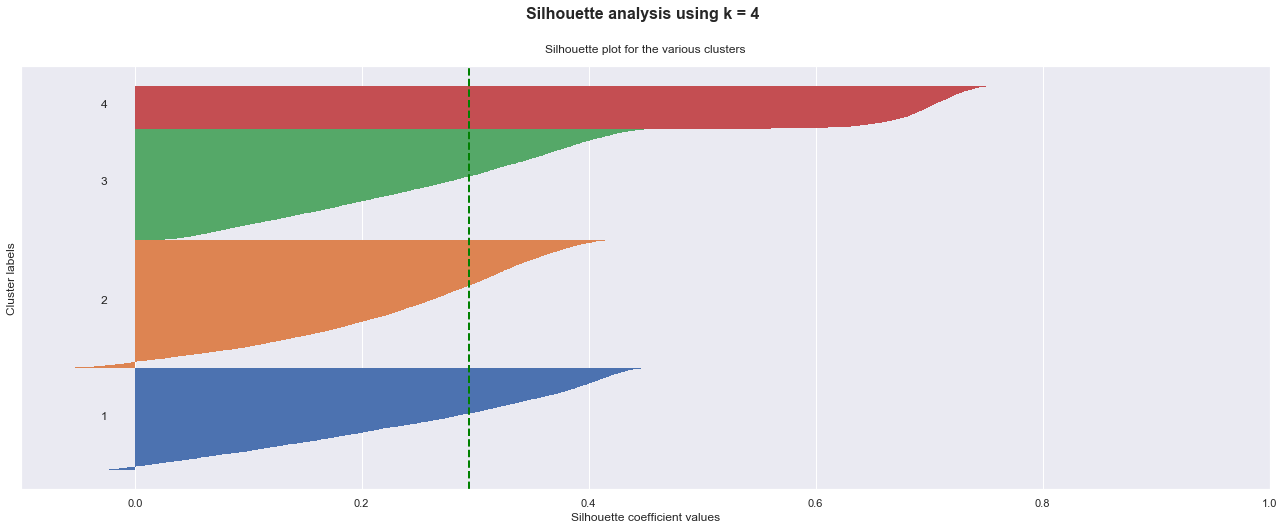

In [525]:
from sklearn.metrics import silhouette_samples

for i, k in enumerate([2, 3, 4]):
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(data.drop(['ID'],1))
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(data.drop(['ID'],1), labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels

    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

### Hierarchical clustering

In [527]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [546]:
Z = hierarchy.linkage(data.drop(["ID"],1)[::5], 'ward')

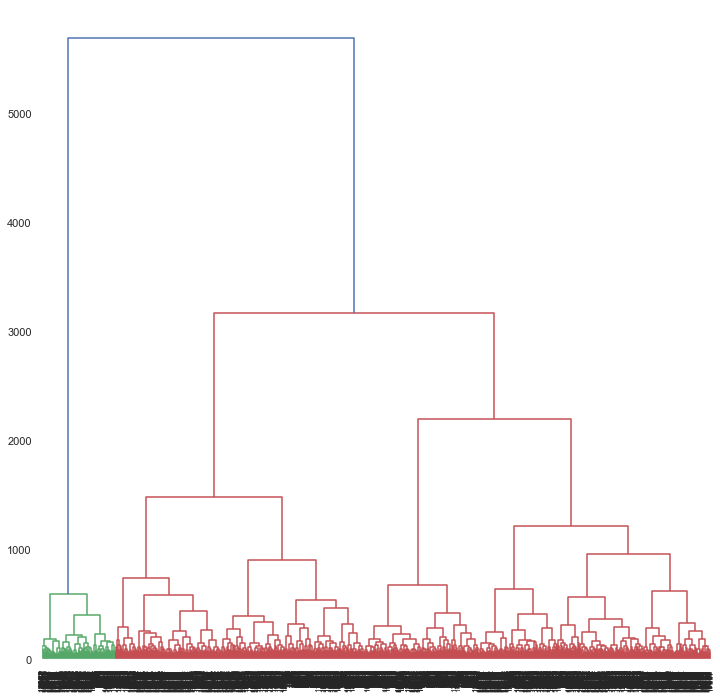

In [547]:
fig, ax = plt.subplots(figsize=(12,12))
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=data.drop(["ID"],1)[::5].index)
None

In [531]:
 agg = AgglomerativeClustering(5, linkage='ward')

In [532]:
 agg.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [533]:
 AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [534]:
km3 = KMeans(3)

In [536]:
km3.fit(data)
km3_df = pd.DataFrame(km3.cluster_centers_, columns = data.columns)
data_km3 = data.assign(km_cluster = km3.labels_)
data_km3['ID'] = data['ID']

In [537]:
 data_cluster = data_km3.assign(agg_cluster = agg.labels_)

In [538]:
data2.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special'],
      dtype='object')

In [540]:
data2["ID"]=data2["ID"].astype(str)
data_cluster["ID"]=data_cluster["ID"].astype(str)


In [545]:
data2.Club = data2.Club.replace(np.nan, 'Unknown')
joint = data2.merge(data_cluster, on='ID')

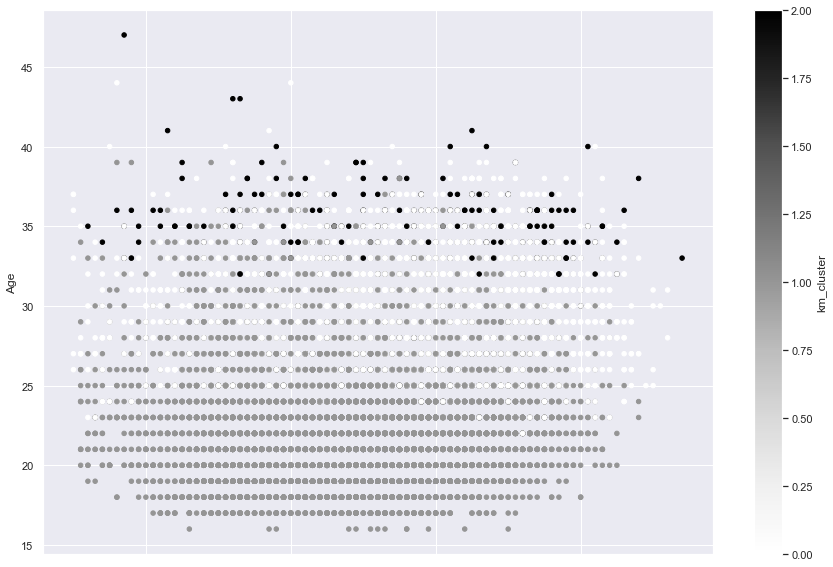

In [542]:
joint.plot.scatter('Vision', 'Age', c='km_cluster')

In [ ]:
 def plot_3D(data_3D, labels=None, **kwargs):
    fig_ = plt.figure(figsize=(10,8))
    ax = Axes3D(fig_)
    ax.scatter(data_3D.iloc[:, 0], data_3D.iloc[:, 1], data_3D.iloc[:, 2], c=labels, **kwargs) 
    return ax